In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.stats import chi2_contingency

# read from csv file
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

#set index as movie id 
ratings.set_index(['movieId'], inplace = True)
movies.set_index(['movieId'], inplace = True)
tags.set_index(['movieId'], inplace = True)

movies['year'] = movies['title'].str[-5:-1]

movies['Action'] = movies.apply(lambda x: 1 if 'Action' in x.genres else 0, axis = 1)
movies['Adventure'] = movies.apply(lambda x: 1 if 'Adventure' in x.genres else 0, axis = 1)
movies['Animation'] = movies.apply(lambda x: 1 if 'Animation' in x.genres else 0, axis = 1)
movies['Children'] = movies.apply(lambda x: 1 if 'Children' in x.genres else 0, axis = 1)
movies['Comedy'] = movies.apply(lambda x: 1 if 'Comedy' in x.genres else 0, axis = 1)
movies['Crime'] = movies.apply(lambda x: 1 if 'Crime' in x.genres else 0, axis = 1)
movies['Documentary'] = movies.apply(lambda x: 1 if 'Documentary' in x.genres else 0, axis = 1)
movies['Drama'] = movies.apply(lambda x: 1 if 'Drama' in x.genres else 0, axis = 1)
movies['Fantasy'] = movies.apply(lambda x: 1 if 'Fantasy' in x.genres else 0, axis = 1)
movies['Film-Noir'] = movies.apply(lambda x: 1 if 'Film-Noir' in x.genres else 0, axis = 1)
movies['Horror'] = movies.apply(lambda x: 1 if 'Horror' in x.genres else 0, axis = 1)
movies['Musical'] = movies.apply(lambda x: 1 if 'Musical' in x.genres else 0, axis = 1)
movies['Mystery'] = movies.apply(lambda x: 1 if 'Mystery' in x.genres else 0, axis = 1)
movies['Romance'] = movies.apply(lambda x: 1 if 'Romance' in x.genres else 0, axis = 1)
movies['Sci-Fi'] = movies.apply(lambda x: 1 if 'Sci-Fi' in x.genres else 0, axis = 1)
movies['Thriller'] = movies.apply(lambda x: 1 if 'Thriller' in x.genres else 0, axis = 1)
movies['War'] = movies.apply(lambda x: 1 if 'War' in x.genres else 0, axis = 1)
movies['Western'] = movies.apply(lambda x: 1 if 'Western' in x.genres else 0, axis = 1)
movies['Non'] = movies.apply(lambda x: 1 if 'no genres listed' in x.genres else 0, axis = 1)


#drop the timestamp column
ratings.drop(columns = 'timestamp', inplace = True)
tags.drop(columns = 'timestamp', inplace = True)

#combine the three dataframe
ratings = ratings.combine_first(movies) 
tags = tags.combine_first(movies)

ratings_order = ['title', 'genres', 'userId', 'rating', 'Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
                 'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','Non']
ratings = ratings[ratings_order]
tags_order = ['title', 'genres', 'userId', 'tag', 'Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
                 'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','Non']
tags = tags[tags_order]

#test
print(ratings.loc[ratings.index==184931])
print(tags.loc[tags.index==184931])
movies




                     title                       genres  userId  rating  \
movieId                                                                   
184931   Death Wish (2018)  Action|Crime|Drama|Thriller   514.0     4.0   

         Action  Adventure  Animation  Children  Comedy  Crime  ...  \
movieId                                                         ...   
184931        1          0          0         0       0      1  ...   

         Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
movieId                                                                        
184931           0       0        0        0        0       0         1    0   

         Western  Non  
movieId                
184931         0    0  

[1 rows x 23 columns]
                     title                       genres  userId  tag  Action  \
movieId                                                                        
184931   Death Wish (2018)  Action|Crime|Drama|Thriller     NaN 

,title,genres,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Non
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,1995,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
193585,Flint (2017),Drama,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
ratings['year'] = ratings['title'].str[-5:-1]
ratings.head(2500)

,title,genres,userId,rating,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Non,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,332.0,4.0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1995
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,335.0,5.0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1995
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,336.0,5.0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1995


<AxesSubplot:xlabel='year', ylabel='rating'>

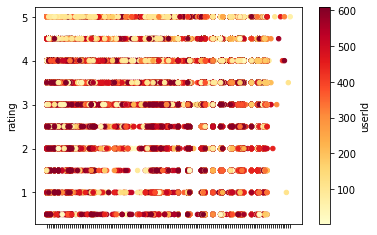

In [3]:
# Split the data into training and test sets.
ratings_train = ratings.loc[:193609].copy()
ratings_test = ratings.loc[47:].copy()

ratings_train.plot.scatter(x="year", y="rating", c="userId", 
                            cmap=cm.YlOrRd)



year    Bab   Roa  007)  008)  011)  012)  014)  1902  1903  1908  ...  atso  \
Drama                                                              ...         
0         1     1     1     1     0     1     1     1     1     1  ...     1   
1         0     0     1     0     2     0     0     0     0     0  ...     0   

year   erso  he O  imal  irro  ligh  lon   osmo  r On  ron   
Drama                                                        
0         1     1     0     1     0     1     1     1     1  
1         0     0     1     0     1     0     0     0     0  

[2 rows x 127 columns]
year
 Bab    0.000103
 Roa    0.000103
007)    0.000205
008)    0.000103
011)    0.000205
          ...   
ligh    0.000103
lon     0.000103
osmo    0.000103
r On    0.000103
ron     0.000103
Length: 127, dtype: float64
year    Bab   Roa  007)  008)  011)  012)  014)  1902  1903  1908  ...  atso  \
Drama                                                              ...         
0       1.0   1.0   0.5   1

<AxesSubplot:xlabel='year'>

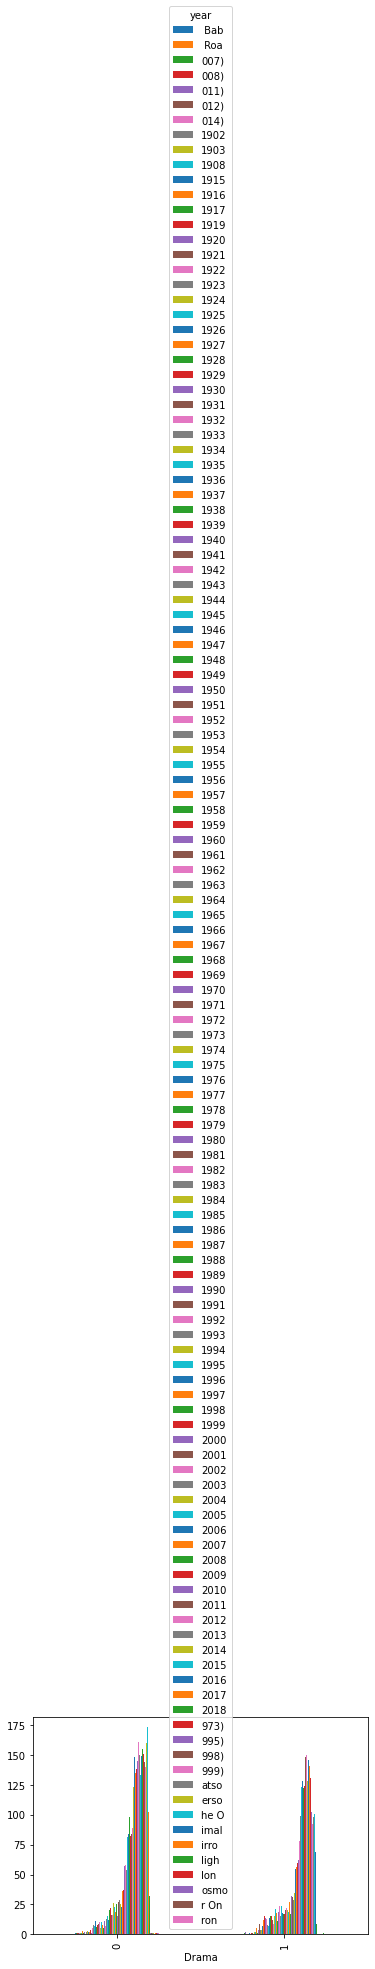

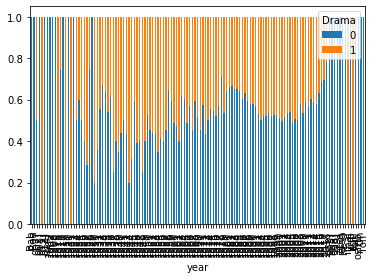

In [4]:
ct = pd.crosstab(movies.Drama, movies['year'])
print(ct)
ct.plot.bar()
print(ct.sum()/ct.sum().sum())
print(ct/ct.sum())
(ct/ct.sum()).T.plot.bar(stacked = True)

year    Bab   Roa  007)  008)  011)  012)  014)  1902  1903  1908  ...  atso  \
Crime                                                              ...         
0         1     1     2     1     1     1     1     1     0     1  ...     1   
1         0     0     0     0     1     0     0     0     1     0  ...     0   

year   erso  he O  imal  irro  ligh  lon   osmo  r On  ron   
Crime                                                        
0         1     1     1     1     1     1     1     1     1  
1         0     0     0     0     0     0     0     0     0  

[2 rows x 127 columns]
year
 Bab    0.000103
 Roa    0.000103
007)    0.000205
008)    0.000103
011)    0.000205
          ...   
ligh    0.000103
lon     0.000103
osmo    0.000103
r On    0.000103
ron     0.000103
Length: 127, dtype: float64
year    Bab   Roa  007)  008)  011)  012)  014)  1902  1903  1908  ...  atso  \
Crime                                                              ...         
0       1.0   1.0   1.0   1

ValueError: pie requires either y column or 'subplots=True'

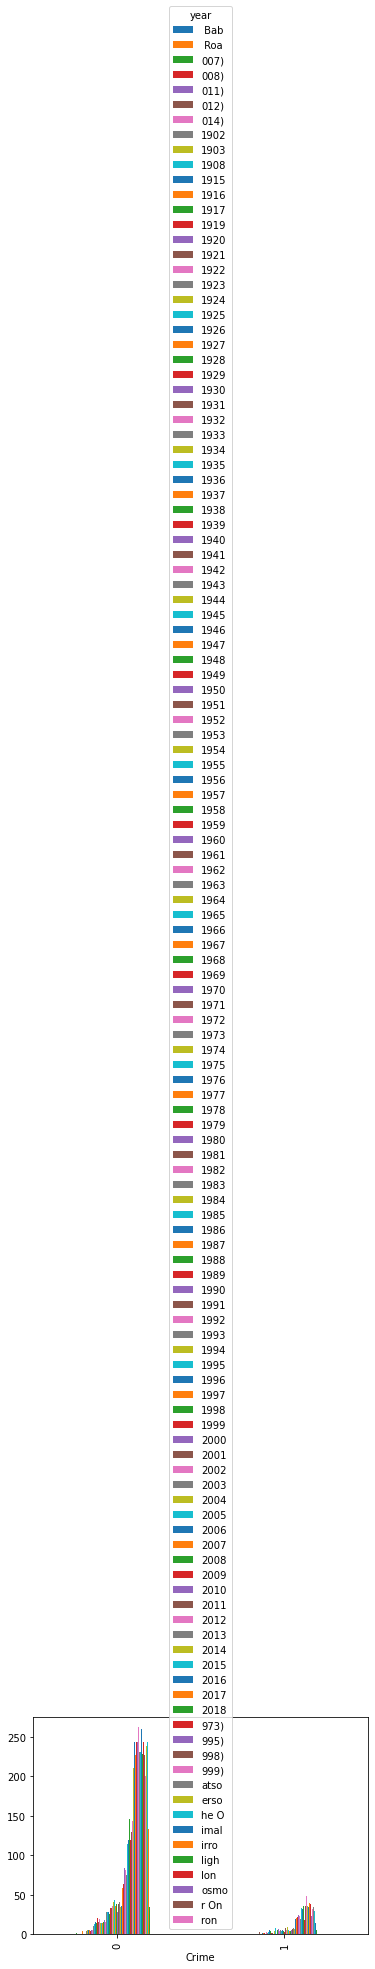

In [5]:
ct = pd.crosstab(movies.Crime, movies['year'])
print(ct)
ct.plot.bar()
print(ct.sum()/ct.sum().sum())
print(ct/ct.sum())
ct.plot.pie(autopct = '%1.1f%%')

<AxesSubplot:xlabel='Action'>

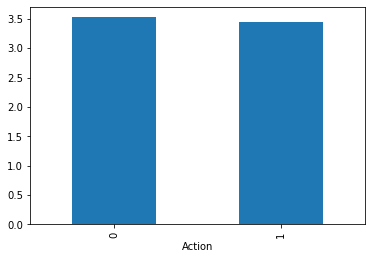

In [6]:
X=ratings.groupby("Action")["rating"].mean()
X.plot.bar()

<AxesSubplot:xlabel='year'>

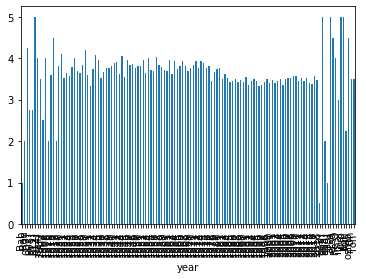

In [7]:
X=ratings.groupby("year")["rating"].mean()
X.plot.bar()

In [14]:
Y=pd.crosstab(ratings['rating'], ratings['Drama'],
 normalize=True, margins=True)
Y

Drama,0,1,All
rating,,,
0.5,0.009570,0.004016,0.013586
1.0,0.019993,0.007884,0.027877
1.5,0.012952,0.004810,0.017762
2.0,0.051688,0.023196,0.074884
2.5,0.035979,0.019061,0.055040
3.0,0.124023,0.074785,0.198808
3.5,0.075588,0.054683,0.130271
4.0,0.143381,0.122575,0.265957
4.5,0.042981,0.041820,0.084801


We use marginal distribution to calculate conditional probability, which is a statistical method of analyzing our correlation between variables.
Hypothesis
If independent then: P(A and B) = P(A)* P(B)
If independent then: P(A|B) = P(A)

P(3.5-4.0 and 12.0) = 0.165775
P(3.5-4.0) * P(12.0) = 0.320856 * 0.540107 = 0.17329657
Therefore NOT INDEPENDENT as 0.165775 ！= 0.17329657